## Objective of Assignment:

1. to create Linear regression model on whole Boston data set
2. to get coefs_ and intercept
3. to create SGD regressor model from scratch 
4. to get coefs_ and intercept and find MSE.


**Optional assignment to be done by me which includes:**

1. application of VIF
2. RFE model
3. OLS linear model to check p value and elimination of columns:
4. Gradient descent


**1.Linear Regression model on whole training dataset:**

In [1]:
#importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_boston()
X = data.data
y = data.target

#creating dataframe:
X = pd.DataFrame(X, columns=data.feature_names)
X.head(8)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15


In [3]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Features Scaling**

In [4]:
#since features are on different scale hence standardization is pertinent in here 
#so as to have all the features on same scale:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_tr = sc.fit_transform(X)

In [5]:
print(X_tr.shape)
print(y.shape)
print('*************************************************')
print(X_tr[0:2])

(506, 13)
(506,)
*************************************************
[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]]


**SGD model on whole training data**

In [10]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()


In [11]:
#fitting the model to training data:
sgd.fit(X_tr, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

**Coefficients and weigts calcuclation**

In [12]:
Lrcoff = sgd.coef_
Lrintercept = sgd.intercept_
print(Lrcoff)
print(Lrintercept)

[-0.6598845   0.64232432 -0.42616794  0.79033099 -1.07672019  3.10713943
 -0.07346617 -2.22188605  0.88959298 -0.34883815 -1.82730231  0.90520125
 -3.407096  ]
[22.36464309]


**Prediction on whole training dataset:**

In [14]:
ypred = sgd.predict(X_tr)

In [15]:
#creating dataframe of true values against observed values:

df = pd.DataFrame({'True Value': y,
                  'Observed Value': ypred})
df.head(20)

,Observed Value,True Value
0,30.383951,24.0
1,24.703202,21.6
2,30.531706,34.7
3,28.914979,33.4
4,28.430883,36.2
5,25.277974,28.7
6,22.853074,22.9
7,19.871547,27.1
8,12.072140,16.5
9,19.352813,18.9


**Mean Squared error and R squared error calculation**

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
mean_sq_error = mean_squared_error(y, sgd.predict(X_tr))
r2_error = r2_score(y, sgd.predict(X_tr))
print('Mean Squared Error is: {:<.3f}'.format(mean_sq_error))
print('R squared error is: {:<.3f}'.format(r2_error))

Mean Squared Error is: 22.756
R squared error is: 0.730


**Plotting graph of actual value against the predicted value of training data**

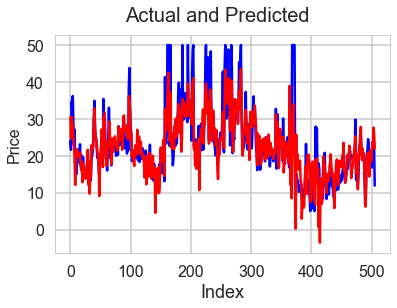

In [18]:
#Actual vs Predicted
c = [i for i in range(len(X_tr))]
fig = plt.figure()
plt.plot(c,y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,sgd.predict(X_tr), color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

**Plotting the error**

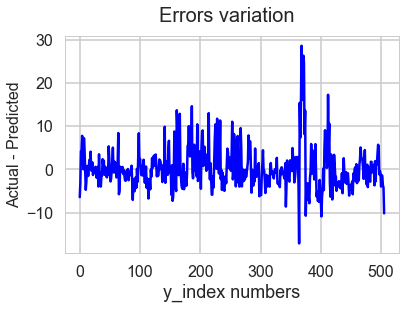

In [19]:
# index assignment for each y index:
c = [i for i in range(len(y))]

fig = plt.figure()
plt.plot(c, y - sgd.predict(X_tr), color="blue", linewidth=2.5, linestyle="-")
                      
fig.suptitle('Errors variation', fontsize=20)                       # Plot heading 
plt.xlabel('y_index numbers', fontsize=18)                          # X-label
plt.ylabel('Actual - Predicted', fontsize=16)                       # Y-label

**Conclusion on Linear Regression**

1. Mean squared error is 21% meaning  our model is not able to match 21%  of the values in training data.
2. R squared error coming around 74% meaning model is learnt the parameters good enough (intercept, weights, etc) during          training phase.

In [54]:
y.shape

(506,)

In [ ]:
for each epcoh:
w0 = w0 - alpha* 2* avg of (Xt*(y-(w0*x+b0))) here w0t*xi+b (w0*xi is matrix multiplication) 
should be n*1 matrix resultin yi-(w0t*xi+b0) is a n*1 matrix, Xt*(yi-(w0t*xi+b0)) => d*1
b0 = b0 - alpha* 2* avg of (y-(w0*x+b0))"

In [ ]:
np.random.choice()

In [61]:
def SGD(x, y, learning_rate=1/2,batch_size=25):
    epochs = 100
    iterations = int(len(x) / batch_size)
    
    for times in range(epochs):
        intercept = np.random.random()
        weights = np.random.randn(13,1)   
        df = pd.DataFrame(columns=['intercept','weight', 'MSE'])
        for cycle in range(iterations):
            index = np.random.choice(len(X_tr), batch_size,replace=True) 
            weights = weights - 2 * learning_rate / len(index) *np.matmul(x[index].T, np.matmul(x[index], weights) - y[index])
            intercept = intercept -2 * learning_rate / len(index) *(np.matmul(x[index], weights) - y[index] + intercept)
            MSE = 1 / len(index) *np.sum(np.square(y[index] - np.matmul(x[index], weights) - intercept))
            df.loc[cycle] = [intercept, weights, MSE]
            weights = weights - learning_rate
            intercept = intercept - learning_rate
            learning_rate = learning_rate - learning_rate / 2
            
    return weights, intercept, MSE


In [62]:
SGD(X_tr, y)

(array([[ 1.30364531,  1.30364531,  1.30364531,  1.30364531,  1.30364531,
          1.30364531,  1.30364531,  1.30364531,  1.30364531,  1.30364531,
          1.30364531,  1.30364531,  1.30364531,  1.30364531,  1.30364531,
          1.30364531,  1.30364531,  1.30364531,  1.30364531,  1.30364531,
          1.30364531,  1.30364531,  1.30364531,  1.30364531,  1.30364531],
        [ 0.2313468 ,  0.2313468 ,  0.2313468 ,  0.2313468 ,  0.2313468 ,
          0.2313468 ,  0.2313468 ,  0.2313468 ,  0.2313468 ,  0.2313468 ,
          0.2313468 ,  0.2313468 ,  0.2313468 ,  0.2313468 ,  0.2313468 ,
          0.2313468 ,  0.2313468 ,  0.2313468 ,  0.2313468 ,  0.2313468 ,
          0.2313468 ,  0.2313468 ,  0.2313468 ,  0.2313468 ,  0.2313468 ],
        [ 0.84480048,  0.84480048,  0.84480048,  0.84480048,  0.84480048,
          0.84480048,  0.84480048,  0.84480048,  0.84480048,  0.84480048,
          0.84480048,  0.84480048,  0.84480048,  0.84480048,  0.84480048,
          0.84480048,  0.84480048,  

In [ ]:
def dL_dw(X,e,w):
    return -2*X.T.dot(e)/len(X)

def gradient_descent(gamma=1e-3, n_epochs=100, batch_size=20, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            e = y_obs[idx] - X[idx].dot(w) # Really important that you use y_obs and not y (you do not have access to true y)
            #update parameters
            w = w - gamma*dL_dw(X[idx],e,w)
        loss[i] = e.T.dot(e)/len(e)    
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

In [46]:
SGD(X_tr, y)

,intercept,weight,MSE
0,"[[0.5920265807499565, 0.5920265807499565, 0.59...","[[0.14410359127933695, 0.14410359127933695, 0....",14471.695201
1,"[[0.5920265807499565, 0.5920265807499565, 0.59...","[[0.14410359127933695, 0.14410359127933695, 0....",9579.574923
2,"[[0.5920265807499565, 0.5920265807499565, 0.59...","[[0.14410359127933695, 0.14410359127933695, 0....",15317.331119
3,"[[0.5920265807499565, 0.5920265807499565, 0.59...","[[0.14410359127933695, 0.14410359127933695, 0....",13639.347931
4,"[[0.5920265807499565, 0.5920265807499565, 0.59...","[[0.14410359127933695, 0.14410359127933695, 0....",9987.778050
5,"[[0.5920265807499565, 0.5920265807499565, 0.59...","[[0.14410359127933695, 0.14410359127933695, 0....",16646.688008
6,"[[0.5920265807499565, 0.5920265807499565, 0.59...","[[0.14410359127933695, 0.14410359127933695, 0....",16044.067509
7,"[[0.5920265807499565, 0.5920265807499565, 0.59...","[[0.14410359127933695, 0.14410359127933695, 0....",16347.083722
8,"[[0.5920265807499565, 0.5920265807499565, 0.59...","[[0.14410359127933695, 0.14410359127933695, 0....",17145.391977
9,"[[0.5920265807499565, 0.5920265807499565, 0.59...","[[0.14410359127933695, 0.14410359127933695, 0....",14225.754374


In [42]:
X_tr.shape

(506, 13)

In [41]:
from sklearn.preprocessing import StandardScaler
import numpy as np
bos['PRICE'] = data.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
df_sample =X[:100]
price =Y[:100]
xi_1=[]
price_1=[]
N = len(df_sample)
for j in range(N):
    scaler = StandardScaler()
    scaler.fit(df_sample) 
    xtrs = scaler.transform(df_sample)
    xi_1.append(xtrs)
    yi=np.asmatrix(price)
    price_1.append(yi)
#print(price_1)
#print(xi_1)
xi=xi_1   
price=price_1
r= 1
m_deriv = 0
b_deriv = 0
learning_rate = 1
it = 1
w0_random = np.random.rand(13)
w0 = np.asmatrix(w0_random).T
b = np.random.rand()
b0 = np.random.rand() 
while True:
   for i in range(N):
       # -2x * (y-(mx +b))
       w1=w0
       b1=b0
       m_deriv = np.dot(-2*xi[i].T , (price[i] - np.dot(xi[i] , w1) + b1))
       # -2(y - (mx + b))
       b_deriv = -2*(price[i] - (np.dot(xi[i] , w1) + b1))
   w0_new = m_deriv * learning_rate
   b0_new = b_deriv * learning_rate
   w1 = w0 - w0_new
   b1 = b0 - b0_new
   it += 1
   if (w0==w1).all():
       break
   else:
       w0 = w1
       b0 = b1
       learning_rate = learning_rate/2
print("m_deriv=",m_deriv)
print("b_driv",b_deriv) 

NameError: name 'bos' is not defined

In [36]:
b = np.random.rand()
b

0.2720913006793566

In [20]:
np.random.normal(0,1)

0.10373603711389427

**Stochastic Gradient Descent**

In [15]:
def SGD(x, y, learning_rate=1/2, iteration=1000, batch_size=25):
    intercept = np.zeros(batch_size)
    weights = np.ones(x.shape[1])
    df = pd.DataFrame(columns=['intercept','weight', 'MSE'])
    for i in range(iteration):
        index = np.random.choice(len(X_tr), batch_size,replace=False) 
        weights = weights - 2 * learning_rate / len(index) *np.matmul(x[index].T, np.matmul(x[index], weights) - y[index])
        intercept = intercept -2 * learning_rate / len(index) *(np.matmul(x[index], weights) - y[index] + intercept)
        learning_rate = learning_rate /2
        MSE = np.sum(np.square(y[index] - np.matmul(x[index], weights) - intercept) / len(index))
        df.loc[i] = [intercept, weights, MSE]
    return df
SGD(X_tr, y)

,intercept,weight,MSE
0,"[0.05580077717056838, -0.11204521237110412, -0...","[-4.715750360804832, -0.4741383075683603, -4.8...",1018.878053
1,"[0.9267888168675957, -1.218499235711144, 0.094...","[0.3532167321024584, -5.584403432141129, 4.321...",2048.384544
2,"[0.8893518913742461, -0.8713002230226595, -0.3...","[-5.660106497287092, 4.9208594815191935, -3.42...",1381.303692
3,"[1.0215150818544287, -0.7100423404906547, -0.2...","[-1.9492148276262515, 1.7384319066602005, 0.53...",475.894385
4,"[1.099518200372496, -0.6371134991242302, -0.22...","[-1.9058664589274434, 1.3790371293114978, 0.71...",467.315489
5,"[1.1160229909807315, -0.5628242950790975, -0.1...","[-1.821597444494666, 1.537746876529104, 0.5583...",664.879453
6,"[1.1224872862272688, -0.5522498299941896, -0.1...","[-1.841589723627871, 1.5743485163105106, 0.483...",520.349853
7,"[1.131221212773459, -0.5440237892087119, -0.17...","[-1.8661348266479432, 1.5456757052429373, 0.45...",571.389157
8,"[1.1324912523873305, -0.5416473508145577, -0.1...","[-1.8693218114937005, 1.5614392427161023, 0.43...",531.178846
9,"[1.1358066489422254, -0.5396461064162128, -0.1...","[-1.8694795518676006, 1.5522742522443778, 0.42...",581.881405


**Plotting Graph**

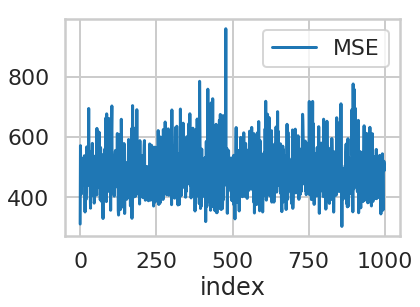

In [16]:
# print cost
SGD(X_tr, y).reset_index().plot.line(x='index', y=['MSE'])

**SGD for learning rate=1/4**

In [17]:
def SGD(x, y, learning_rate=1/4, iteration=1000, batch_size=25):
    intercept = np.zeros(batch_size)
    weights = np.ones(x.shape[1])
    df = pd.DataFrame(columns=['intercept','weight', 'MSE'])
    for i in range(iteration):
        index = np.random.choice(len(X_tr), batch_size,replace=False) 
        weights = weights - 2 * learning_rate / len(index) *np.matmul(x[index].T, np.matmul(x[index], weights) - y[index])
        intercept = intercept -2 * learning_rate / len(index) *(np.matmul(x[index], weights) - y[index] + intercept)
        learning_rate = learning_rate /2
        MSE = np.sum(np.square(y[index] - np.matmul(x[index], weights) - intercept) / len(index))
        df.loc[i] = [intercept, weights, MSE]
    return df
SGD(X_tr, y)

,intercept,weight,MSE
0,"[0.7045452452113671, 0.3170138646798899, 0.254...","[-3.6291289230277375, 0.39914346705207715, 1.7...",646.237451
1,"[0.8786108691295674, 0.6701088721187909, 0.481...","[-3.606375552665678, -0.9069841640638149, 2.96...",535.421300
2,"[0.9630921522153675, 0.7116945548212806, 0.601...","[-4.307586953460814, 0.48021782715626593, 0.75...",396.662776
3,"[1.001867891950096, 0.7563537457840662, 0.6364...","[-3.5716241441578616, 0.30936429391244824, 1.2...",507.413134
4,"[1.0178813517656105, 0.7839966754772146, 0.656...","[-3.602196889051727, 0.4063396748242726, 1.156...",425.074247
5,"[1.029925122448325, 0.8007511841895459, 0.6666...","[-3.568540124841534, 0.32714894199288097, 1.13...",489.738126
6,"[1.0373053075488652, 0.807667857419113, 0.6726...","[-3.5838064747506477, 0.3393564961495232, 1.12...",435.597717
7,"[1.04131054967023, 0.8102854708378358, 0.67721...","[-3.5476627029752055, 0.32238121907935685, 1.1...",540.548670
8,"[1.042791525377204, 0.8115145139237377, 0.6784...","[-3.5444494692381268, 0.3292832030636473, 1.14...",460.339808
9,"[1.0433061341989025, 0.8123690326652717, 0.679...","[-3.53730754054719, 0.3258656196031408, 1.1434...",440.351008


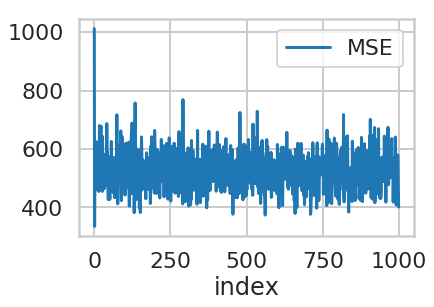

In [18]:
# plotting
SGD(X_tr, y).reset_index().plot.line(x='index', y=['MSE'])

**Conclusion**

1. We could see there's the value of coeeifients and weights are converged, eventhough not sure as to why MSE value is            not getting converged.

## optionalSection:

**Gradient Descent without intercept term**

In [19]:
def grad_descent(x, y, learning_rate=2, iteration=1000):
    weights = np.ones(X_tr.shape[1])
    df = pd.DataFrame(columns=['weight', 'MSE'])
    for i in range(iteration):
        weights = weights - 2 * learning_rate / len(x) *np.matmul(x.T, np.matmul(x, weights) - y)
        learning_rate = learning_rate / 4
        MSE = np.sum(np.square(y - np.matmul(x, weights)) / len(x))
        df.loc[i] = [weights, MSE]
    return df                
grad_descent(X_tr, y) 

,weight,MSE
0,"[-24.719616854098533, 18.812660114316667, -29....",4.797598e+04
1,"[112.50766762260658, -114.4075845626346, 154.9...",1.235768e+06
2,"[-59.49854602523537, 61.698504269817036, -83.3...",3.483853e+05
3,"[-36.79730564199394, 38.270693316396496, -51.6...",1.331077e+05
4,"[-33.2983541129733, 34.65324284546819, -46.750...",1.089570e+05
5,"[-32.507560654877146, 33.83530836282411, -45.6...",1.038333e+05
6,"[-32.31460652081497, 33.635710019040744, -45.3...",1.026018e+05
7,"[-32.26665740429597, 33.58610846478053, -45.30...",1.022969e+05
8,"[-32.254688105484334, 33.573726591889525, -45....",1.022209e+05
9,"[-32.25169690287011, 33.57063227916764, -45.28...",1.022019e+05


**Plotting the convergence graph**

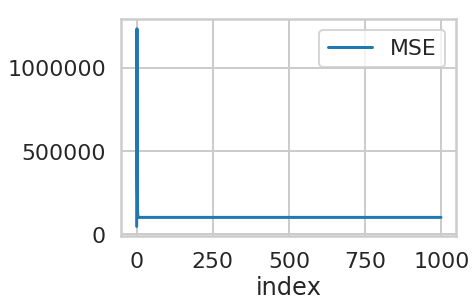

In [20]:
# plotting
grad_descent(X_tr, y).reset_index().plot.line(x='index', y=['MSE'])

**GD for decay = learning rate/2**

In [21]:
def grad_descent(x, y, learning_rate=1/2, iteration=1000):
    weights = np.ones(X_tr.shape[1])
    df = pd.DataFrame(columns=['weight', 'MSE'])
    for i in range(iteration):
        weights = weights - 2 * learning_rate / len(x) *np.matmul(x.T, np.matmul(x, weights) - y)
        learning_rate = learning_rate / 2
        MSE = np.sum(np.square(y - np.matmul(x, weights)) / len(x))
        df.loc[i] = [weights, MSE]
    return df                
grad_descent(X_tr, y) 

,weight,MSE
0,"[-5.429904213524633, 5.453165028579167, -6.632...",2775.101769
1,"[9.31229226599177, -9.529428670322567, 13.5661...",10044.855661
2,"[-5.7387734802000505, 5.928947690464392, -7.38...",3211.490090
3,"[-1.7434562764220418, 1.81479359521403, -1.835...",680.378359
4,"[-1.2751693106555004, 1.3293833804595718, -1.1...",589.002423
5,"[-1.1308190411971653, 1.1789591728728983, -0.9...",569.507003
6,"[-1.0725088519328363, 1.11799886033211, -0.907...",562.789148
7,"[-1.046157551527662, 1.0904011641263052, -0.87...",559.971559
8,"[-1.033615882808093, 1.0772541448303465, -0.85...",558.678266
9,"[-1.0274959734402698, 1.0708358166524543, -0.8...",558.058351


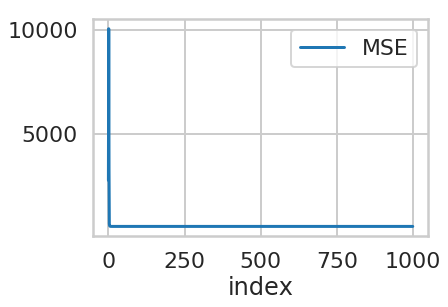

In [22]:
# plotting
grad_descent(X_tr, y).reset_index().plot.line(x='index', y=['MSE'])

**Conclusion of GD**

1. we could see the convergence of MSE after 29th cycle

**GD with intercept term added**

In [23]:
def grad_descent(x, y, learning_rate=1/2, iteration=1000):
    constant = np.ones(len(x))
    weights = np.ones(x.shape[1])
    df = pd.DataFrame(columns=['constant','weight', 'MSE'])
    for i in range(iteration):
        weights = weights - 2 * learning_rate / len(x) *np.matmul(x.T, np.matmul(x, weights) - y)
        constant = constant -2 * learning_rate / len(x) *(np.matmul(x, weights) - y + constant)
        learning_rate = learning_rate / 2
        MSE = np.sum(np.square(y - np.matmul(x, weights) - constant) / len(x))
        df.loc[i] = [constant, weights, MSE]
    return df
grad_descent(X_tr, y)

,constant,weight,MSE
0,"[0.9499233125978112, 0.9795708065177248, 0.969...","[-5.429904213524633, 5.453165028579167, -6.632...",2720.252214
1,"[1.0467970457170384, 1.0538213078182532, 1.074...","[9.31229226599177, -9.529428670322567, 13.5661...",9997.313018
2,"[1.0326713172247313, 1.0475126663728251, 1.065...","[-5.7387734802000505, 5.928947690464392, -7.38...",3161.706905
3,"[1.0339079486064089, 1.0501219582780514, 1.068...","[-1.7434562764220418, 1.81479359521403, -1.835...",632.075073
4,"[1.0350126194325697, 1.0517648289425219, 1.071...","[-1.2751693106555004, 1.3293833804595718, -1.1...",540.804032
5,"[1.0356399293014362, 1.0526384724764706, 1.072...","[-1.1308190411971653, 1.1789591728728983, -0.9...",521.320577
6,"[1.0359687299475668, 1.0530858499903373, 1.073...","[-1.0725088519328363, 1.11799886033211, -0.907...",514.602270
7,"[1.0361365529655875, 1.0533119253429708, 1.073...","[-1.046157551527662, 1.0904011641263052, -0.87...",511.783139
8,"[1.0362212790287346, 1.0534255311427934, 1.073...","[-1.033615882808093, 1.0772541448303465, -0.85...",510.488775
9,"[1.036263840804595, 1.0534824726784395, 1.0735...","[-1.0274959734402698, 1.0708358166524543, -0.8...",509.868253


**Plotting convergence graph with intercept term added**

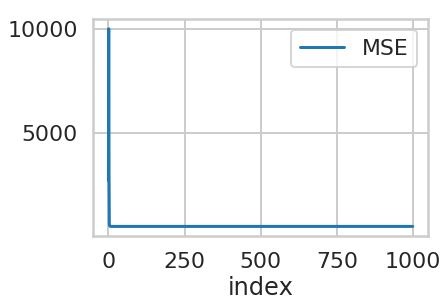

In [24]:
# plotting
grad_descent(X_tr, y).reset_index().plot.line(x='index', y=['MSE'])

**Conclusion**

1. we could see MSE value is improved by significant amount with addition of intercept term through gradient descent and the MSE is also converged after 28th cycle

## Optional 2: 

**1. checking P-value through Statsmodels library using OLS algo**

**2. checking multicollinearity using VIF Score**

In [25]:
#standardizing the data:
X_tr_sm = X

X_tr_sm = sc.fit_transform(X)
type(X_tr_sm)

numpy.ndarray

In [26]:
X_tr_sm.shape

(506, 13)

In [27]:
import statsmodels.api as sm

X_tr_sm = pd.DataFrame(X_tr_sm, columns=X.columns)
#stats model api doesnt add constant in its equation so we need to add manually add constant
print(X_tr_sm.shape)
print()
X_tr_sm = sm.add_constant(X_tr_sm, prepend=True, has_constant='skip')
print('after adding constant the shape is : {}'.format(X_tr_sm.shape))

(506, 13)

after adding constant the shape is : (506, 14)


In [28]:
X_tr_sm.columns

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

**Model fitting throug OLS**

In [29]:
#fitting the model thru Odrinary least square model:
lrm1 = sm.OLS(endog=y, exog=X_tr_sm).fit()

#printing coeffieient:
lrm1.params

const      22.532806
CRIM       -0.920411
ZN          1.080981
INDUS       0.142967
CHAS        0.682203
NOX        -2.060092
RM          2.670641
AGE         0.021121
DIS        -3.104448
RAD         2.658787
TAX        -2.075898
PTRATIO    -2.062156
B           0.856640
LSTAT      -3.748680
dtype: float64

**Checking p-value**

In [30]:
#analysing model parameters:
#1. std-err - measure of variability in the estimate for these coefficient(also called std deviation)to keep low.
#   eg: std-err for constant is 22.53 +- 0.211
#2. t - ratio of the estimated coff by std err.it calculates p value.
#3. p - parameter for deciding whether to accept or reject NULL hypothesis
#4. r-squared - when addition of new column is done, R-square value is increased.
#5. adj. R-squared ..whenever any addition of new column is added, it penalizes it by some number.

print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 05 Jan 2019   Prob (F-statistic):          6.95e-135
Time:                        01:05:11   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.807      0.0

**We could use backward elimination of feature removal by seeing the p=value**

**VIF - multicollinearity identifier**

1. if in a dataset more than 1 columns are collinear then it may cause performace issue to the model we build, correlation        matrix can give the idea about whether TWO columns are corelated or not? so in order to find multicollinearity of columns in    a dataset VIF method is used.
2. VIF = 1 / (1 - R ** 2)
3. higher the VIF , higher the multicollinearity.but the variable with high VIF may NOT be statistically INsignificant as it also depends on the p-value.


In [31]:
#adding the new column 'price' to dataset:
X_tr_sm['price'] = y
X_tr_sm.shape

(506, 15)

**VIF function**

In [32]:
# function for calculating vif value of columns:

def vif_cal(dataframe, dependent_col):
    vif_df = pd.DataFrame( columns = ['colNames', 'VIF-Score'])
    x_df = dataframe.drop([dependent_col], axis=1)
    xvar_names = x_df.columns
    for i in range(0, len(xvar_names)):
        y = x_df[xvar_names[i]] 
        x = x_df[xvar_names.drop(xvar_names[i])]
        rsq = sm.OLS(y,x).fit().rsquared  
        vif = round(1 /(1 - rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'VIF-Score', axis=0, ascending=False, inplace=False)

In [33]:
vif_cal(X_tr_sm, dependent_col='price')

,colNames,VIF-Score
10,TAX,9.01
9,RAD,7.48
5,NOX,4.40
3,INDUS,3.99
8,DIS,3.96
7,AGE,3.10
13,LSTAT,2.94
2,ZN,2.30
6,RM,1.93
11,PTRATIO,1.80


In [34]:
#removing 'Age' column as its having both high p value and high VIF value:
X_tr_sm = X_tr_sm.drop('AGE', axis=1)

**Creating second OlS model after removal of 'age'column**

In [35]:
#creating second linear model after removing the age column:
lrm2 = sm.OLS(endog=X_tr_sm.iloc[:,-1], exog=X_tr_sm.iloc[:, 0:-1]).fit()

In [36]:
print(lrm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sat, 05 Jan 2019   Prob (F-statistic):          6.28e-136
Time:                        01:08:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.915      0.0

**VIF value checking after column removal**

In [37]:
#vif value after removing 'AGE' column:
vif_cal(X_tr_sm, dependent_col='price')

,colNames,VIF-Score
9,TAX,9.00
8,RAD,7.44
5,NOX,4.09
3,INDUS,3.99
7,DIS,3.62
12,LSTAT,2.60
2,ZN,2.27
6,RM,1.85
10,PTRATIO,1.79
1,CRIM,1.77


In [38]:
#removing INDUS column which is having both high p value and VIF factor:
X_tr_sm = X_tr_sm.drop('INDUS', axis=1)
print(X_tr_sm.columns)

Index(['const', 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')


In [39]:
#creating third linear model after removing the INDUS column:
lrm3 = sm.OLS(endog=X_tr_sm.iloc[:,-1], exog=X_tr_sm.iloc[:,0:-1]).fit()
print(lrm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 05 Jan 2019   Prob (F-statistic):          5.74e-137
Time:                        01:08:58   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    107.011      0.0

In [40]:
vif_cal(X_tr_sm, dependent_col='price')

,colNames,VIF-Score
8,TAX,7.27
7,RAD,6.85
4,NOX,3.78
6,DIS,3.44
11,LSTAT,2.58
2,ZN,2.24
5,RM,1.84
1,CRIM,1.77
9,PTRATIO,1.76
10,B,1.34


In [41]:
X_tr_sm.columns

Index(['const', 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

**prediction using final model(lrm3)**

In [42]:
y_pred = lrm3.predict(X_tr_sm.iloc[:,0:-1])

**Evaluation of model**

Text(0, 0.5, 'Price')

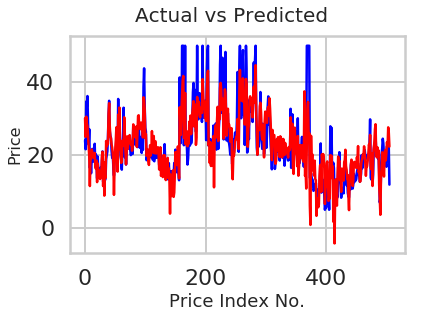

In [43]:
#Actual vs Predicted
c = [i for i in range(len(y))]
fig = plt.figure()
plt.plot(c,y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred , color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Price Index No.', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

**Plotting error**

Text(0, 0.5, 'Actual - Predicted')

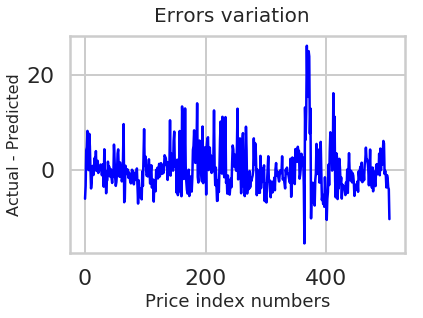

In [44]:
# index assignment for each y index:
c = [i for i in range(len(y))]

fig = plt.figure()
plt.plot(c, y - y_pred, color="blue", linewidth=2.5, linestyle="-")
                      
fig.suptitle('Errors variation', fontsize=20)               # Plot heading 
plt.xlabel('Price index numbers', fontsize=18)                         # X-label
plt.ylabel('Actual - Predicted', fontsize=16)               # Y-label

**Plotting Distribution of errors**

Text(0, 0.5, 'Price index ')

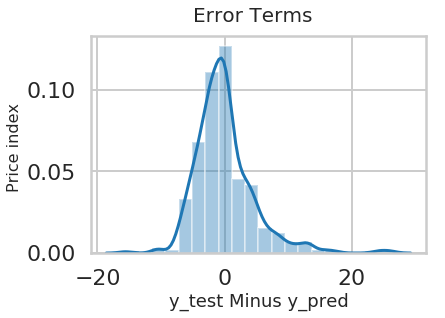

In [45]:
#Plotting Distribution of errors

fig = plt.figure()
sns.distplot((y - y_pred), bins=20)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test Minus y_pred', fontsize=18)                  # X-label
plt.ylabel('Price index ', fontsize=16)                          # Y-label

**building final regressor model with featured columns**

In [46]:
#removing the columns of constant of 1s in dataframe:
X_tr_sm = X_tr_sm.drop('const', axis=1)

In [47]:
lrfinal = LinearRegression(fit_intercept=True)

In [48]:
X_tr_sm.columns

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'price'],
      dtype='object')

In [49]:
X_tr_sm.iloc[:,0:-1].head(2)

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-0.272599,-0.144217,0.413672,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.272599,-0.740262,0.194274,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439


In [50]:
lrfinal.fit(X_tr_sm.iloc[:,0:-1],X_tr_sm.iloc[:,-1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Prediction**

In [51]:
#prediction:
y_pred_final = lrfinal.predict(X_tr_sm.iloc[:,0:-1])

**calculating performence metrics**

In [52]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y, y_pred_final)
rSquare = r2_score(y, y_pred_final)
print('R-squared Error after removal of columns is :{}'.format(rSquare))
print()
print('Mean Squared Error after removal of columns is :{}'.format(mse))


R-squared Error after removal of columns is :0.7405453520461442

Mean Squared Error after removal of columns is :21.903046222918693


## Optional 3 :

**RFE - Recursive Feature Engineering - A technique can be helpful in selecting no of best 'D' features in dataset**

In [53]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [54]:
X1 = data.data
y1 = data.target

#creating dataframe:
df= pd.DataFrame(X1, columns=data.feature_names)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


**importing libraries**

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

**RFE  model on 11 best features out of 13 features**

In [56]:
lr = LinearRegression()
rfe = RFE(lr, 11) # we want to have 11 best features
rfe.fit(X1, y1)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=11, step=1, verbose=0)

In [57]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True  True  True False
  True]
[1 1 1 1 1 1 3 1 1 1 1 2 1]


In [58]:
col = df.columns[rfe.support_]
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

**Creating Dataframe based on the best 11 features selected through RFE**

In [59]:
x_rfe = df[col]
x_rfe.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,9.14


In [60]:
#standardization(have taken median in place of mean):
x_rfe = x_rfe.apply(lambda x: (x - np.median(x)) / np.std(x))
x_rfe.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.029132,0.772552,-1.076811,0.0,0.000000,0.522137,0.419537,-0.459841,-0.201936,-1.733859,-0.894309
1,-0.026688,0.000000,-0.382282,0.0,-0.596045,0.302740,0.836483,-0.344881,-0.522657,-0.577953,-0.311186


**Adding a constant variable to statsmodel module as it doesnt take constant term into account**

In [61]:
import statsmodels.api as sm  
# Adding a constant variable 
x_rfe = sm.add_constant(x_rfe)

#building OLS linear model:
lm = sm.OLS(y1, x_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.0
Date:                Sat, 05 Jan 2019   Prob (F-statistic):          2.35e-134
Time:                        01:18:09   Log-Likelihood:                -1505.1
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9400      0.327     70.065      0.0

**VIF of RFE model**

In [62]:
#adding price column to dataframe:
x_rfe['price'] = y1

In [63]:
vif_cal(x_rfe, dependent_col='price')

,colNames,VIF-Score
9,TAX,8.99
8,RAD,7.39
5,NOX,4.07
3,INDUS,3.99
7,DIS,3.61
11,LSTAT,2.54
0,const,2.36
2,ZN,2.27
6,RM,1.84
10,PTRATIO,1.79


**Prediction of RFE linear model**

In [64]:
y_pred_rfe = lm.predict(x_rfe.iloc[:,0:-1])

**RFE model evaluation**


Text(0, 0.5, 'Price')

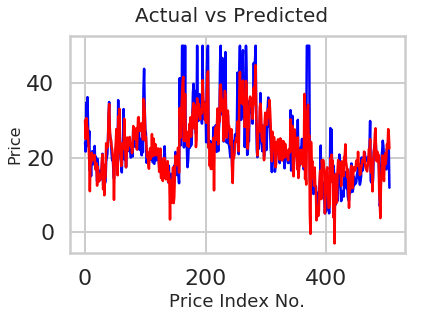

In [65]:
#Actual vs Predicted
c = [i for i in range(len(y_pred_rfe))]
fig = plt.figure()
plt.plot(c,x_rfe['price'].values, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_rfe , color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Price Index No.', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

**Error calculation**

Text(0, 0.5, 'Actual - Predicted')

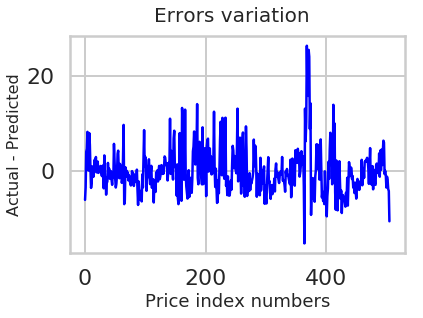

In [66]:
#Actual vs Predicted
c = [i for i in range(len(y_pred_rfe))]
fig = plt.figure()
plt.plot(c,x_rfe['price'].values - y_pred_rfe, color="blue", linewidth=2.5, linestyle="-")

fig.suptitle('Errors variation', fontsize=20)               # Plot heading 
plt.xlabel('Price index numbers', fontsize=18)                         # X-label
plt.ylabel('Actual - Predicted', fontsize=16)               # Y-label

**RFE performance metrics**

In [67]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(x_rfe['price'].values, y_pred_rfe)
rSquare = r2_score(x_rfe['price'].values, y_pred_rfe)
print('R-squared Error after removal of columns is :{}'.format(rSquare))
print()
print('Mean Squared Error after removal of columns is :{}'.format(mse))


R-squared Error after removal of columns is :0.7341071071512404

Mean Squared Error after removal of columns is :22.446559999371175


**SGD on Linear Regression(Mean squared Error)**